In [13]:
critics={
    'BTS':{'생일':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'생일':2.5, '바울':2, '할로윈':1},
    '나훈아':{'생일':3.5, '바울':4, '할로윈':5}
}

In [14]:
critics
# 손흥민이가 생일 영화를 봤다면 평점으로 몇점을 줄것인지 예측해보자
# 사용자 기반 CF 활용하여 구해보자

{'BTS': {'생일': 5, '바울': 4, '할로윈': 1.5},
 '손흥민': {'바울': 5, '할로윈': 2},
 '조용필': {'생일': 2.5, '바울': 2, '할로윈': 1},
 '나훈아': {'생일': 3.5, '바울': 4, '할로윈': 5}}

In [15]:
# collaborative filtering(CF) : 여러 사람들로부터 얻은 정보에 따라 각각의 사용자들의 관심사를 자동으로 예측
# 아이템 기반 : 데이터가 부족한 경우(사용자 수가 적을 때 사용)
# 사용자 기반 : 데이터가 있는 경우(일반적)

# critics['BTS']
# critics.get('BTS') # get 함수 : 키(BTS)가 존재할 경우에는 위 문장과 같은 의미로 해석

# critics['AOA']
# print(critics.get('AOA')) # 오류발생 안하며, None이 출력됨

# critics['AOA'] # 키(AOA)가 존재하지 않아서 오류 발생
# print(critics.get('AOA'))


# critics라는 변수, get이라는 함수에도 .get을 써서 출력 가능
critics.get('BTS').get('할로윈')

1.5

In [16]:
# 거리를 구하여(피타고라스 정리) 두 사람간의 유사도 계산
# => 계신값이 작으면 작을수록, 두 사람간의 유사도 높다(거리가 가까우니까)
# 1) (x1,y1), (x2,y2)
# 거리 => ((x2-x1)제곱 +((y2-y1)제곱) 제곱근
    
    
# math : 수학 관련 다양한 함수들이 저장되어 있음
from math import sqrt
# 두점 사이의 거리 : sqrt(pow(3,2)+pow(1,2))
# 3의제곱 + 1의제곱의 합에 대한 제곱근을 취함

def sim(i,j): # sim : 두 점에 대한 좌표를 전달받아 각각의 축에 전달
    return sqrt(pow(i,2)+pow(j,2))
print(sim(3,1))



# 조용필와 손흥민 간의 거리 구하기
# ★★ 피타고라스는 x축과 y축, 2개의 데이터에서만 사용 가능!

#     'BTS':{'생일':5, '바울':4, '할로윈':1.5},
#     '손흥민':{'바울':5, '할로윈':2},

var1=critics['조용필']['바울']-critics['손흥민']['바울']  # -> x축
var2=critics['조용필']['할로윈']-critics['손흥민']['할로윈']  # -> y축
sim(var1,var2)

# [결과] 손흥민과 가까운 사람은 'BTS', 조용필과 나훈아와의 거리는 동일

3.1622776601683795


3.1622776601683795

In [17]:
# 손흥민과 다른 사람들과의 거리 구하기

for i in critics:
    if i != "손흥민": # 자기자신은 제외(나와 다른 사람간의 유사도를 구하므로)
        var1=critics[i]['바울']-critics['손흥민']['바울']
        var2=critics[i]['할로윈']-critics['손흥민']['할로윈']
#         print(i,"와 손흥민과의 거리 :",sim(var1,var2))
        print(i,"와 손흥민과의 유사도 :",1/(1+sim(var1,var2)))
        # 1/(1+sim(var1,var2) 값 => 0 : 낮, 1 : 높
        
        
# 컬럼별로 데이터의 포함범위가 다른 경우가 있음 (하나는 0~5점, 다른 하나는 0~10점 등등)
# 이런 경우에 '정규화' 또는 표준화' 필요!


# 축이 2개인 경우에만 거리를 구할 수 있다! 세 개 이상이면 불가!

BTS 와 손흥민과의 유사도 : 0.4721359549995794
조용필 와 손흥민과의 유사도 : 0.2402530733520421
나훈아 와 손흥민과의 유사도 : 0.2402530733520421


In [21]:
def sim_distance(data,name1,name2): #sim_distance : 유사도 검색
    sum=0
    for i in data[name1]: # 영화 제목이 i변수에 저장, {'생일':3.5, '바울':4, '할로윈':5}
        if i in data[name2]: # '같은 영화를 봤다면' 
#                               나훈아는 봤는데 손흥민은 '생일'이란 영화를 보지 않았음 => 결과값에서 제외
#             print(data[name1][i])
#             print(data[name2][i])
#             print("="*50)
            
            sum+=pow(data[name1][i]-data[name2][i],2)
        #for j in data[name2]: # 영화 제목이 j변수에 저장, {'바울':5, '할로윈':2},
          
            
    return 1/(1+sqrt(sum))
sim_distance(critics,"나훈아",'손흥민') # 나훈아와 손흥민 간의 유클리드안 거리

0.2402530733520421

In [32]:
# 딕셔너리 전체에서 가장 유사도가 비슷한 큰 사람을 검색(상위 몇 명)

def top_match(data,name,index=3,sf=sim_distance): # 함수 이름을 변수에도 저장할 수 있음(호출가능)
    myList=[]
    for i in data:  # i에는 이름이 저장(name)
        if name !=i: # 이름이 같지 않은 것 빼라(자기 자신인 손흥민은 제외)
            myList.append((sf(data,name,i),i))
#             sf(data,name,i) # name : 손흥민, i: 나훈아, 조용필, BTS...
    myList.sort() # 오름차순
    myList.reverse() # 내림차순
    return myList[:index]

print(top_match(critics,"손흥민",3)) # 손흥민과 가장 가까운 두 사람만 출력
# top_match : 손흥민을 제외한 나머지 사람들과의 유사도를 출력(내림차순 정렬)

[(0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필'), (0.2402530733520421, '나훈아')]


In [77]:
# 시각화를 하는 함수 기입
import matplotlib.pyplot as plt
def myBar(score,names):
    s=range(len(score))  # s=[0,1,2]
    plt.barh(s,score,height=0.5,color='r')
    plt.yticks(s,names)
    plt.xlabel("유사도")
    plt.ylabel("이름")
    plt.title("손흥민과 다른 사람들간의 유사도")
    plt.show()

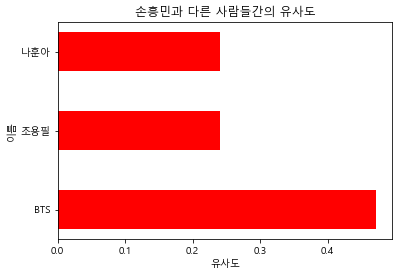

In [78]:
# top_match 함수의 수행결과를 시각화하기
# x축에는 유사도, y축에는 이름으로 구성된 수평 막대바로 출력
li=top_match(critics,"손흥민",3)

# 분리작업 : 유사도. 이름값을 따로 리스트로 만들어주어야 한다
score=[]
names=[]
for i in li:
    score.append(i[0])
    names.append(i[1])
myBar(score,names)

In [146]:
# 상관게수 적용하기

critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블핑': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '인어공주': 3.5,
    },
    '싸이': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '장범준': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '있지': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '백지영': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이은미': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0}
}

[0, 6, 0, 5]

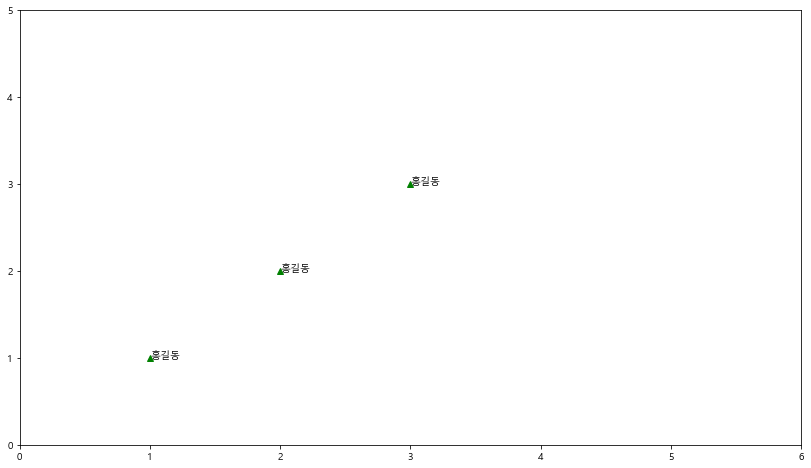

In [147]:
# scatter plot 이용

plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^')  # (1,1), (2,2), (3,3) 위치에 점을 출력해라 
plt.text(1,1,'홍길동')
plt.text(2,2,'홍길동')
plt.text(3,3,'홍길동')  # 각각의 점마다 홍길동이 생성
plt.axis([0,6,0,5]) # x축은 0~6까지, y축은 0~5까지
# 데이터의 범위에 fit하게 박스가 만들어짐 -> axis를 직접 지정

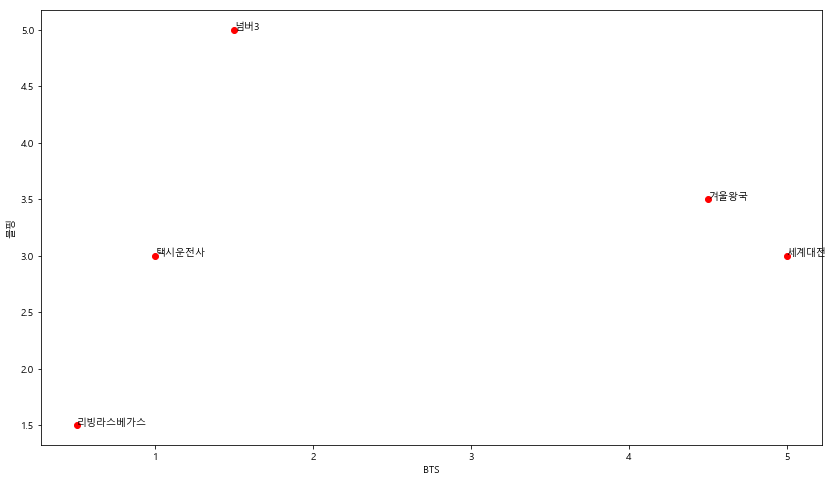

In [148]:
# 두 사람이 영화 점수를 얼마나 주었는지? (x축 BTS, y축 블핑 = 공통된 영화 5개 점으로!)
def drawGraph(data,name1,name2): # critics를 data로 BTS를 name1로,,,
    plt.figure(figsize=(14,8))
    li=[] # BTS 영화 평점을 저장하기 위한 리스트
    li2=[] # 블핑 영화 평점을 저장하기 위한 리스트
    
    for i in data[name1]: # BTS가 본 영화(i)를
        if i in data[name2]: # 블핑이 봤다면
            li.append(data[name1][i]) # BTS가 본 영화의 평점이 추가
            li2.append(data[name2][i]) # 블핑이 본 영화의 평점이 추가
            plt.text(data[name1][i],data[name2][i],i) # BTS가 준 영화 평점, 블핑이 준 영화 평점 , 영화이름
                                         
    plt.plot(li,li2,'ro') 
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics,"BTS","블핑")

In [149]:
# 피어스 상관관계 분석

def sim_person(data,name1,name2):
    sumX=0 # X의 합(BTS와 블핑이 모두 본 BTS 평점들의 합)
    sumY=0 # Y의 합(BTS와 블핑이 모두 본 블핑 평점들의 합)
    
    sumPowX=0 # X제곱의 합
    sumPowY=0 # Y제곱의 합
    sumXY=0 # x*y의 합
    count=0 # 영화의 합
    
    for i in data[name1]: # BTS가 본 영화 제목
        if i in data[name2]: # BTS가 본 영화를 블핑도 봤다면
            sumX+=data[name1][i] # BTS가 본 영화 평점
            sumY+=data[name2][i] # 블핑이 본 영화 평점
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i] # ∑XY에 해당
            count+=1
    return (sumXY-(sumX*sumY)/count)/sqrt((sumPowX-pow(sumX,2)/count)*(sumPowY-pow(sumY,2)/count))

sim_person(critics,"BTS","블핑")

0.19047619047619055

In [150]:
def top_match(data,name,index=3,sf=sim_distance): # 함수 이름을 변수에도 저장할 수 있음(호출가능)
    myList=[]
    for i in data:  # i에는 이름이 저장(name)
        if name !=i: # 이름이 같지 않은 것 빼라(자기 자신인 손흥민은 제외)
            myList.append((sf(data,name,i),i))
#             sf(data,name,i) # name : 손흥민, i: 나훈아, 조용필, BTS...
    myList.sort() # 오름차순
    myList.reverse() # 내림차순
    return myList[:index]

In [151]:
#sim_person(critics,"BTS,"있지")

# 싸이
top_match(critics,"싸이",7)

[(0.5358983848622454, '장범준'),
 (0.4721359549995794, '조용필'),
 (0.43050087404306037, '있지'),
 (0.38742588672279304, '이은미'),
 (0.3405424265831667, '블핑'),
 (0.32037724101704074, '백지영'),
 (0.2449655295864104, 'BTS')]

** 예상평점 = 상관계수 * 상대방의 영화평점
ex)  2.4    =   0.6    *     4 
      5     =    1     *     5
     7.4 / 2  => 3.7(평균, 여러사람들의 데이터 반영)